Number of corners detected: 2462


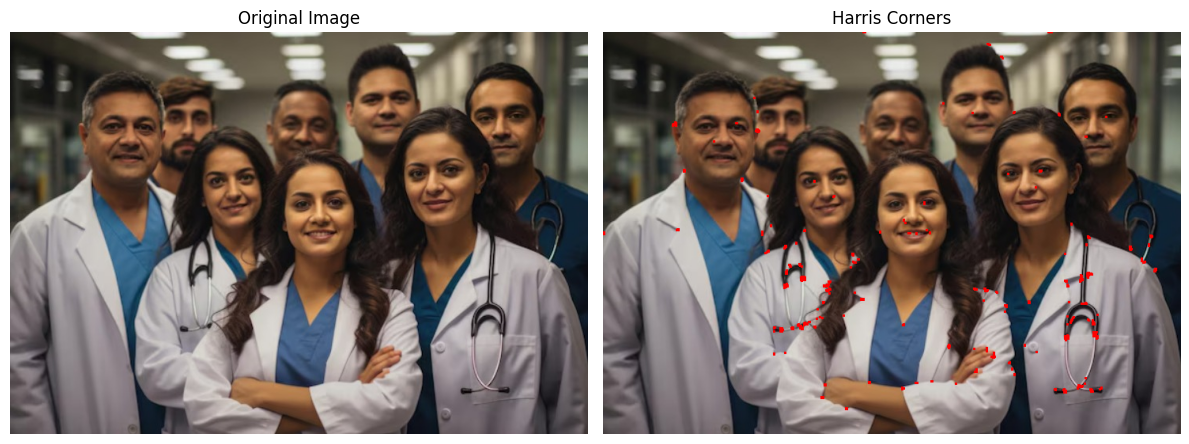

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image_path = 'doctor.jpg'
img = cv2.imread(image_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)

dst = cv2.cornerHarris(src=gray, blockSize=2, ksize=3, k=0.04)
dst_dilated = cv2.dilate(dst, None)

threshold = 0.01 * dst_dilated.max()
corner_img = img.copy()
corner_img[dst_dilated > threshold] = [0, 0, 255]

num_corners = np.sum(dst_dilated > threshold)
print(f"Number of corners detected: {num_corners}")

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(corner_img, cv2.COLOR_BGR2RGB))
plt.title('Harris Corners')
plt.axis('off')

plt.tight_layout()
plt.show()
